### Background Information

- Bike share can be defined as a system for people to rent a bike for mutiple users, where people can find anywhere to use it either for commute from places to places or for excercising. The idea of bike share is to create a system for people who wants to commute with a bike but do not have one, or to ride a bike after using a public transport. The public bike share have increased, where more people have started to use the bike, as people see that bike share can be a cheap alternative as sometimes people can ride for free. Not only for local people but tourists also see bike share as one of the alternative to get to know around the city in a different way.

### Problems

- As more people started to use bike share as a daily commute transportation, the bike avalibilty in particular time might be not available, which lead to losing a potential consumer

### Business Questions

- In what season more people use bike share?
- In what weather more pople use bike share?
- Does people ride more on holiday?
- When is the most popular month and year for bike share?

### Goals

- The goal in this project is to predict how many bikes a bike share company need to provide in bike statiton, thus the company can prevent losing a potential consumer due to the unavailability of bikes to rented

### Importing Common Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Data Description

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

- "weathe_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [5]:
### Getting all the unique value of the columns 

for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

timestamp :
['2015-01-04T00:00:00.000000000' '2015-01-04T01:00:00.000000000'
 '2015-01-04T02:00:00.000000000' ... '2017-01-03T21:00:00.000000000'
 '2017-01-03T22:00:00.000000000' '2017-01-03T23:00:00.000000000']

cnt :
[ 182  138  134 ... 2842   10 2220]

t1 :
[ 3.          2.5         2.          1.          1.5         4.
  5.          6.          6.5         7.          8.          9.
 10.          9.5         8.5        11.          7.5         5.5
  4.5         3.5        11.5        12.         10.5        12.5
 13.         13.5        15.         15.5        14.          0.5
  0.         -0.5        -1.         -1.5        16.         14.5
 16.5        17.5        17.         18.         19.5        20.5
 20.         18.5        21.5        22.5        22.         23.5
 23.         24.         25.         19.         21.         24.5
 25.5        26.         27.         28.5        29.         30.
 33.         32.         31.5        33.5        34.         29.5
 27.5        26.

In [6]:
data_desc =[]

for i in df.columns: 
    data_desc.append([ #add i, type data, how many NaN, percentage , how many unique, unique value 
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique() 
    ])


In [7]:
pd.DataFrame(data=data_desc, columns=['Data','Data Types','Null','Null Percentage','Unique','Unique Sample'])

,Data,Data Types,Null,Null Percentage,Unique,Unique Sample
0,timestamp,datetime64[ns],0,0.0,17414,"[2015-01-04T00:00:00.000000000, 2015-01-04T01:..."
1,cnt,int64,0,0.0,3781,"[182, 138, 134, 72, 47, 46, 51, 75, 131, 301, ..."
2,t1,float64,0,0.0,73,"[3.0, 2.5, 2.0, 1.0, 1.5, 4.0, 5.0, 6.0, 6.5, ..."
3,t2,float64,0,0.0,82,"[2.0, 2.5, 0.0, -1.0, -0.5, -1.5, 1.5, 1.0, 3...."
4,hum,float64,0,0.0,143,"[93.0, 96.5, 100.0, 87.0, 90.0, 84.0, 81.0, 79..."
5,wind_speed,float64,0,0.0,103,"[6.0, 5.0, 0.0, 6.5, 4.0, 7.0, 8.0, 9.0, 12.0,..."
6,weather_code,float64,0,0.0,7,"[3.0, 1.0, 4.0, 7.0, 2.0, 26.0, 10.0]"
7,is_holiday,float64,0,0.0,2,"[0.0, 1.0]"
8,is_weekend,float64,0,0.0,2,"[1.0, 0.0]"
9,season,float64,0,0.0,4,"[3.0, 0.0, 1.0, 2.0]"


### Checking Missing Value

In [8]:
df.isna().sum()
### No missing value to be worried about, lets move on

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### Checking Outliers Using Box Plot

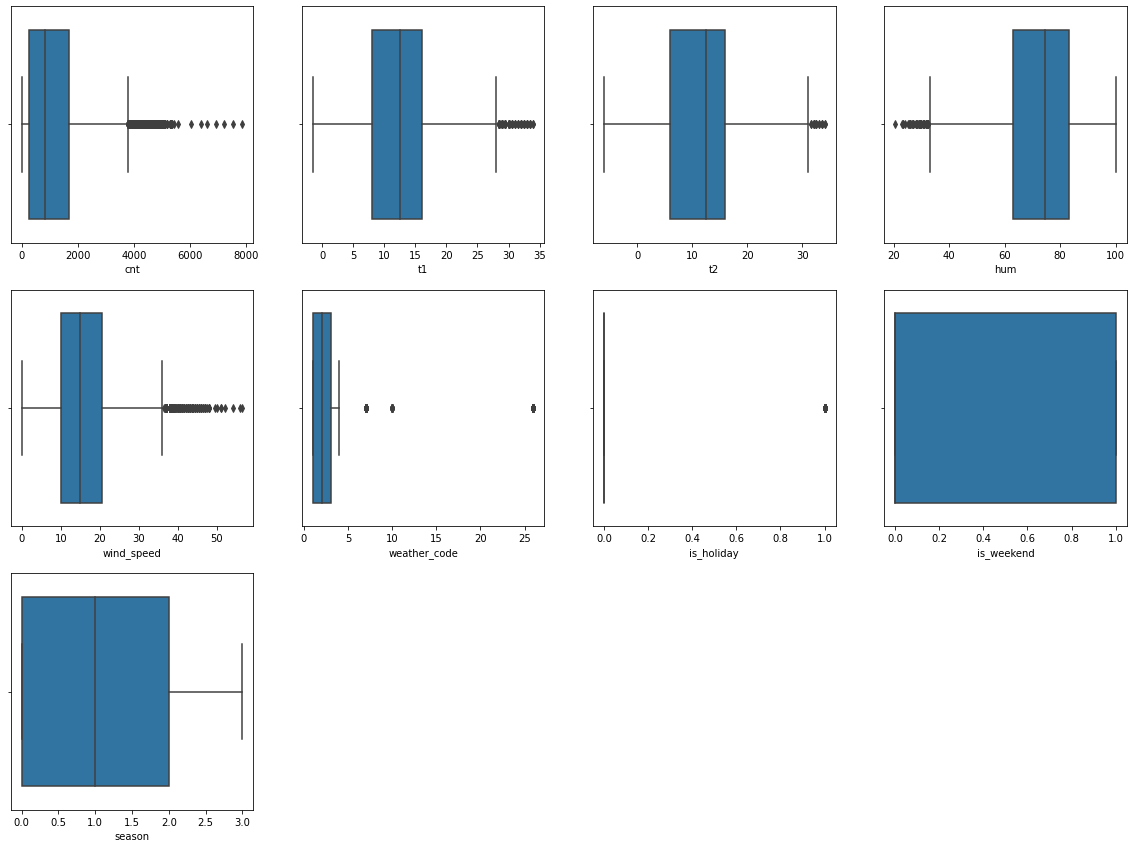

In [9]:
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.describe().columns:
    plt.subplot(4,4,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()
### From these box plot we can see that some of the have a significant outliers
### Cnt is the target so we're not going to do anything with it
### t1 and t2 is temp, we're going to check on it since its depend on the season and the weather
### Same as hum and wind speed it depends on the wheather and the season so we going to check on it
### But we are not going to drop anything since it is normal to have outliers when it comes to wheather

In [10]:
df_description = df.describe()
cntQ1 =  df_description['cnt']['25%']
cntQ3 = df_description['cnt']['75%']
cntIQR = cntQ3 - cntQ1

upfence = cntQ3 + (1.5 * cntIQR)
lofence = cntQ1 - (1.5 * cntIQR)

cntoutliers =  df[(df['cnt'] < lofence) | (df['cnt']> upfence)]
cntoutliers

### There are 675 data outliers of count, but its doesnt matter

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
223,2015-01-13 08:00:00,3960,9.0,6.5,71.0,16.0,2.0,0.0,0.0,3.0
247,2015-01-14 08:00:00,3904,4.0,-1.0,70.0,26.0,2.0,0.0,0.0,3.0
439,2015-01-22 08:00:00,3828,2.0,1.0,81.0,5.0,3.0,0.0,0.0,3.0
559,2015-01-27 08:00:00,3835,5.5,2.5,78.5,15.0,1.0,0.0,0.0,3.0
1230,2015-02-24 08:00:00,3841,6.0,2.0,76.0,20.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
16870,2016-12-12 08:00:00,3982,5.5,3.5,96.5,9.0,2.0,0.0,0.0,3.0
16894,2016-12-13 08:00:00,4258,10.5,10.5,91.0,6.0,3.0,0.0,0.0,3.0
16918,2016-12-14 08:00:00,4162,9.0,8.0,94.0,7.0,1.0,0.0,0.0,3.0
16942,2016-12-15 08:00:00,4198,8.5,6.5,93.5,12.0,4.0,0.0,0.0,3.0


In [11]:
wsQ1 =  df_description['wind_speed']['25%']
wsQ3 = df_description['wind_speed']['75%']
wsIQR = wsQ3 - wsQ1

upfencews = cntQ3 + (1.5 * wsIQR)
lofencews = cntQ1 - (1.5 * wsIQR)

wsoutliers =  df[(df['wind_speed'] < lofencews) | (df['wind_speed']> upfencews)]
wsoutliers

### Windspeed can be different all the time we are going to make a group of it

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [12]:
humQ1 =  df_description['hum']['25%']
humQ3 = df_description['hum']['75%']
humIQR = humQ3 - humQ1

upfencehum = cntQ3 + (1.5 * humIQR)
lofencehum = cntQ1 - (1.5 * humIQR)

humoutliers =  df[(df['hum'] < lofencehum) | (df['hum']> upfencehum)]
humoutliers

### Humidity have the same outliers with 

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [13]:
### As for outliers in temperature looking from the boxplot its seems normal to have 35 degrees, especially in summer
### So we're going to leave that and start to analyze

### Preparing Data for Exploratory Data Analysis

In [14]:
### Creating new columns for year, month, day and hours
timedt = df['timestamp'].dt

In [15]:
df['year'] = timedt.year
df['month'] = timedt.month_name()
df['day'] = timedt.day_name()
df['hour'] = timedt.hour
df['date'] = timedt.date

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04


In [17]:
### We're going to drop t2, because the data tells about the feels's like temp not the actual temp
### We going to use only the actual temperature.
df = df.drop(columns = ['t2'])

In [18]:
### Binning t1 into several groups (Cold, Warm and Hot)
### Source = http://www.city-data.com/forum/weather/272405-how-do-you-classify-cold-warm-6.html
bin_temp = [-1,8,20, 30, df['t1'].max()]
label_temp = ['freezing', 'cold','warm','hot']

df['Temp_Class'] = pd.cut(df['t1'], bins = bin_temp, labels = label_temp)
df.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing


In [19]:
### Binning humidity into two groups (low,optimal and high)
### Source = https://www.centralhtg.com/blog/humidity-levels
bin_hum = [20,40,60,80, df['hum'].max()]
label_hum = ['low', 'optimal','high','very high']

df['level_hum'] = pd.cut(df['hum'], bins = bin_hum, labels = label_hum)
df.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing,very high
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing,very high
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing,very high
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing,very high
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing,very high


In [20]:
### Binning wind speed into three groups(light, moderate, strong)
### Source = https://www.weather.gov/jetstream/beaufort_max
bin_ws = [-1,12,23,34,45, df['wind_speed'].max()]
label_ws = ['light','gentle','fresh', 'moderate','strong']

df['wind_scale'] = pd.cut(df['wind_speed'], bins = bin_ws, labels = label_ws)
df.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing,very high,light
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing,very high,light
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing,very high,light
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing,very high,light
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing,very high,light


In [21]:
### Binning cnt group
bin_cnt = [-1,1600,3200,4800,5400, df['cnt'].max()]
label_cnt = ['idle','normal','quite busy','busy','very busy']

df['daily'] = pd.cut(df['cnt'], bins = bin_cnt, labels = label_cnt)
df.head(20)

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing,very high,light,idle
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing,very high,light,idle
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing,very high,light,idle
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing,very high,light,idle
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing,very high,light,idle
5,2015-01-04 05:00:00,46,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,January,Sunday,5,2015-01-04,freezing,very high,light,idle
6,2015-01-04 06:00:00,51,1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,January,Sunday,6,2015-01-04,freezing,very high,light,idle
7,2015-01-04 07:00:00,75,1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,January,Sunday,7,2015-01-04,freezing,very high,light,idle
8,2015-01-04 08:00:00,131,1.5,96.5,8.0,4.0,0.0,1.0,3.0,2015,January,Sunday,8,2015-01-04,freezing,very high,light,idle
9,2015-01-04 09:00:00,301,2.0,100.0,9.0,3.0,0.0,1.0,3.0,2015,January,Sunday,9,2015-01-04,freezing,very high,light,idle


### Exploratory Data Analysis and Data Visualization

#### Univariate

In [22]:
df.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing,very high,light,idle
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing,very high,light,idle
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing,very high,light,idle
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing,very high,light,idle
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing,very high,light,idle


#### Weather Analysis in three years

In [23]:
df.stb.freq(['weather_code'], cum_cols=False)

,weather_code,count,percent
0,1.0,6150,35.316412
1,2.0,4034,23.165269
2,3.0,3551,20.391639
3,7.0,2141,12.294705
4,4.0,1464,8.407029
5,26.0,60,0.344550
6,10.0,14,0.080395


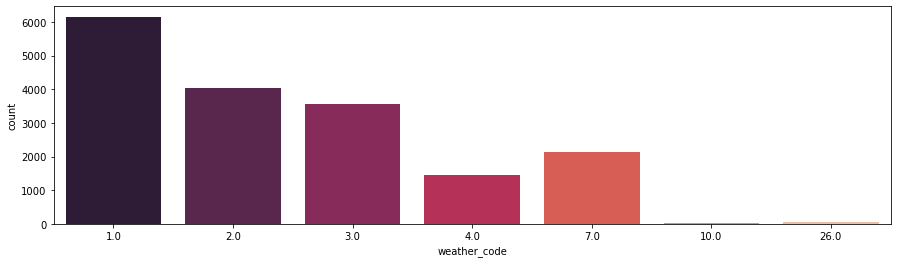

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(df['weather_code'], palette ='rocket')
plt.show()

- From the data we can see that through three years the wheather in London is mostly clear
- Heavy Rain with thunder storm is rarely occur between 2015 - 2017 only 14 times occured
- Snow fall only occur 60 times during 2015 - 2017
- Probably affect the use of bike

#### Checking on Public Holidays in UK, spesifically London

In [25]:
df.stb.freq(['is_holiday'], cum_cols=False)

,is_holiday,count,percent
0,0.0,17030,97.794878
1,1.0,384,2.205122


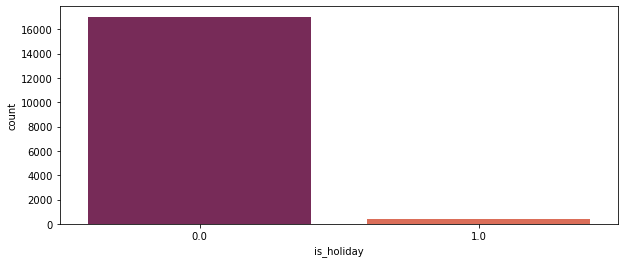

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(df['is_holiday'], palette ='rocket')
plt.show()

In [27]:
df[df['is_holiday'] == 1].head(30)

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
2129,2015-04-03 00:00:00,279,8.0,82.0,10.0,7.0,1.0,0.0,0.0,2015,April,Friday,0,2015-04-03,freezing,very high,light,idle
2130,2015-04-03 01:00:00,174,8.0,79.0,14.0,7.0,1.0,0.0,0.0,2015,April,Friday,1,2015-04-03,freezing,high,gentle,idle
2131,2015-04-03 02:00:00,89,7.5,84.5,12.0,7.0,1.0,0.0,0.0,2015,April,Friday,2,2015-04-03,freezing,very high,light,idle
2132,2015-04-03 03:00:00,61,7.0,87.0,11.0,7.0,1.0,0.0,0.0,2015,April,Friday,3,2015-04-03,freezing,very high,light,idle
2133,2015-04-03 04:00:00,46,7.0,93.0,6.0,7.0,1.0,0.0,0.0,2015,April,Friday,4,2015-04-03,freezing,very high,light,idle
2134,2015-04-03 05:00:00,75,6.5,93.0,8.0,7.0,1.0,0.0,0.0,2015,April,Friday,5,2015-04-03,freezing,very high,light,idle
2135,2015-04-03 06:00:00,78,7.0,90.0,7.5,7.0,1.0,0.0,0.0,2015,April,Friday,6,2015-04-03,freezing,very high,light,idle
2136,2015-04-03 07:00:00,107,7.0,93.0,7.0,26.0,1.0,0.0,0.0,2015,April,Friday,7,2015-04-03,freezing,very high,light,idle
2137,2015-04-03 08:00:00,196,7.5,93.0,4.0,3.0,1.0,0.0,0.0,2015,April,Friday,8,2015-04-03,freezing,very high,light,idle
2138,2015-04-03 09:00:00,423,8.5,93.5,6.0,3.0,1.0,0.0,0.0,2015,April,Friday,9,2015-04-03,cold,very high,light,idle


- From the data above it shows good friday and easter holiday in 2015
- London have only 8 public holidays every year
- Thats why there are only 384 data recorded as public holiday from 2015 - 2016
- Probably did not affect much the bike share
- Source: https://www.gov.uk/bank-holidays

#### Weekend Analysis

In [28]:
df.stb.freq(['is_weekend'], cum_cols=False)

,is_weekend,count,percent
0,0.0,12444,71.459745
1,1.0,4970,28.540255


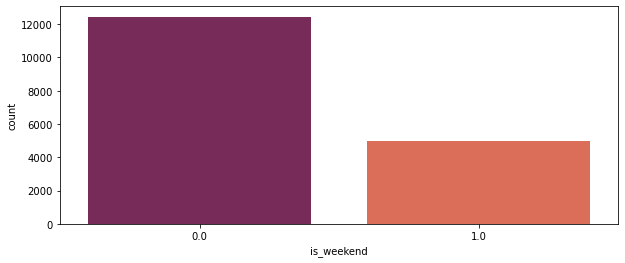

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(df['is_weekend'], palette ='rocket')
plt.show()

- The data shown that from only 28 percent were recorded as weekend which are Saturday and Sunday

#### Season Analysis

In [30]:
df.stb.freq(['season'], cum_cols=False)

,season,count,percent
0,0.0,4394,25.232571
1,1.0,4387,25.192374
2,3.0,4330,24.865051
3,2.0,4303,24.710003


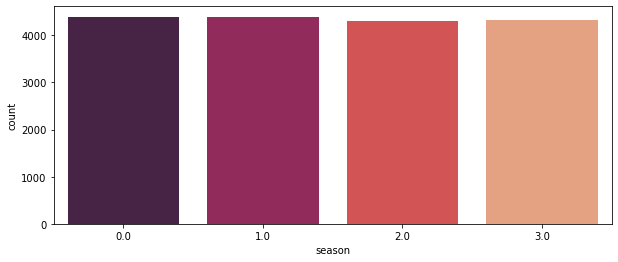

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(df['season'], palette ='rocket')
plt.show()

- The data surely balance because these are 4 seasons in UK
- Spring Summer Fall Winter almost have the same days recorded in data

#### Analyzing Daily Temperature in Londond

In [32]:
df.stb.freq(['Temp_Class'], cum_cols=False)

,Temp_Class,count,percent
0,cold,11573,66.549741
1,freezing,4371,25.135135
2,warm,1418,8.154112
3,hot,28,0.161012


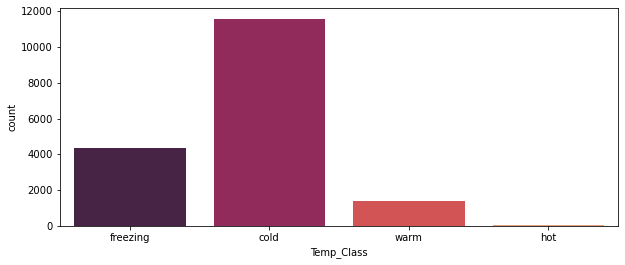

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(df['Temp_Class'], palette ='rocket')
plt.show()

- Mostly London temperature is recoreded as cold meaning its around 7-18 degrees
- We can assume that the spring and fall tend to be cold rather than warm, even though spring is before summer
- Probably reaching 30 above only occured in summer and its not that often

#### Analyzing the level of humidity in London

In [34]:
df.stb.freq(['level_hum'], cum_cols=False)

,level_hum,count,percent
0,high,7755,44.533134
1,very high,6029,34.621569
2,optimal,3250,18.663145
3,low,380,2.182152


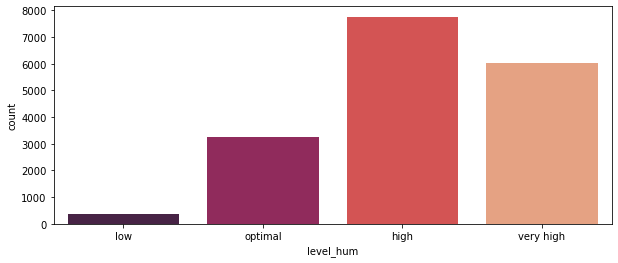

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(df['level_hum'], palette ='rocket')
plt.show()

- We can say that London have a high level of humidity
- Since through out the three years its rarely to have humidity under 40 percent

#### Wind Speed in London

In [36]:
df.stb.freq(['wind_scale'], cum_cols=False)

,wind_scale,count,percent
0,gentle,8034,46.135293
1,light,6504,37.349259
2,fresh,2527,14.511313
3,moderate,316,1.814632
4,strong,33,0.189503


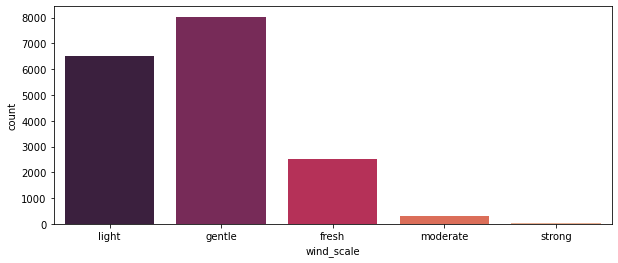

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(df['wind_scale'], palette ='rocket')
plt.show()

- Majority of the days London's wind speed can be considered as gentle
- It is rarely to have a very strong wind speed in London it only occured 33 times through out three years

In [38]:
df.stb.freq(['daily'], cum_cols=False)

,daily,count,percent
0,idle,12807,73.544275
1,normal,3520,20.213621
2,quite busy,1017,5.840129
3,busy,61,0.350293
4,very busy,9,0.051683


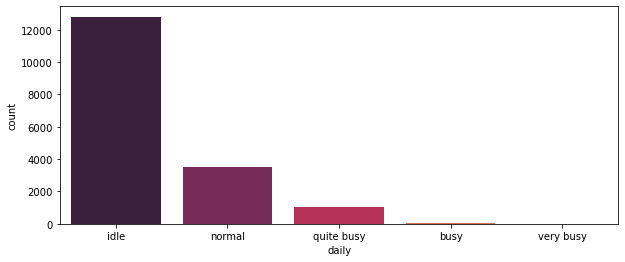

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(df['daily'], palette ='rocket')
plt.show()

In [40]:
total = df['cnt'].sum()
avg = df['cnt'].mean()
print(total)
print(avg)

19905972
1143.1016423567244


In [41]:
dfmax = df[df['cnt']==7860]
dfmax
### This is the most popular day and hour from all the data

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
4470,2015-07-09 17:00:00,7860,23.0,27.0,11.0,1.0,0.0,0.0,1.0,2015,July,Thursday,17,2015-07-09,warm,low,light,very busy


In [42]:
dfmin = df[df['cnt']==0]
dfmin
### This is the only day that no one use any bike in an hour

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
2015,2015-03-29 01:00:00,0,10.5,77.0,33.0,7.0,0.0,1.0,0.0,2015,March,Sunday,1,2015-03-29,cold,high,fresh,idle


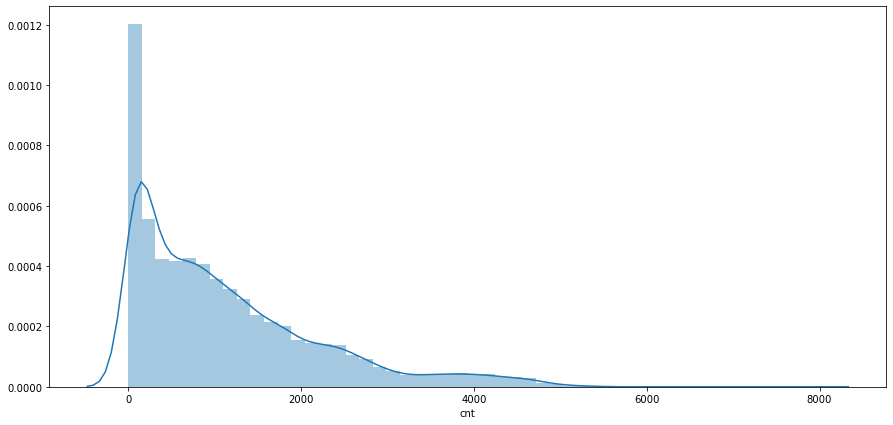

In [43]:
plt.figure(figsize=(15,7))
sns.distplot(df['cnt'])
plt.show()


- Total bike have been rented from 2015 - 2017 = 19905972
- Avg bike every hour is 1143.1016423567244
- Looking at this graphic, there are several hours that bike are not even use
- Atleast every hours there are bike are used even though its below 2000
- From the plot cnt columns showing right skewness or positive skweness. Meaning many bikeshares per hour mostly were in low value where mean value is greater than median. Which shows that many bikeshares that rented perhour are under mean or median, but there are severals bike shares rented perhour much greater than average of daily bikeshare

### Multivariate Analysis

In [44]:
df.head()

,timestamp,cnt,t1,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,date,Temp_Class,level_hum,wind_scale,daily
0,2015-01-04 00:00:00,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,January,Sunday,0,2015-01-04,freezing,very high,light,idle
1,2015-01-04 01:00:00,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,2015,January,Sunday,1,2015-01-04,freezing,very high,light,idle
2,2015-01-04 02:00:00,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,2,2015-01-04,freezing,very high,light,idle
3,2015-01-04 03:00:00,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,January,Sunday,3,2015-01-04,freezing,very high,light,idle
4,2015-01-04 04:00:00,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,January,Sunday,4,2015-01-04,freezing,very high,light,idle


- Cnt is our target so lets see what we can analyze

#### Weather and Bike Usage

In [45]:
pd.crosstab(index= df['weather_code'], columns = 'Average of Bike Share', values =df['cnt'],aggfunc='mean')

col_0,Average of Bike Share
weather_code,
1.0,1162.088943
2.0,1496.177491
3.0,1195.124472
4.0,635.230874
7.0,712.966371
10.0,583.428571
26.0,250.850000


In [46]:
df.groupby('weather_code')['cnt'].mean().sort_values(ascending = False)

weather_code
2.0     1496.177491
3.0     1195.124472
1.0     1162.088943
7.0      712.966371
4.0      635.230874
10.0     583.428571
26.0     250.850000
Name: cnt, dtype: float64

In [47]:
dfcopy = df.copy()

In [48]:
# "weather_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog
dfcopy['weather_code'] = dfcopy['weather_code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 4:"Cloudy", 
                                             7:"light Rain shower", 10:"rain with thunderstorm", 26:"snowfall", 94:"Freezing Fog"})
dfweather = dfcopy.groupby('weather_code')['cnt'].mean().sort_values(ascending = False)

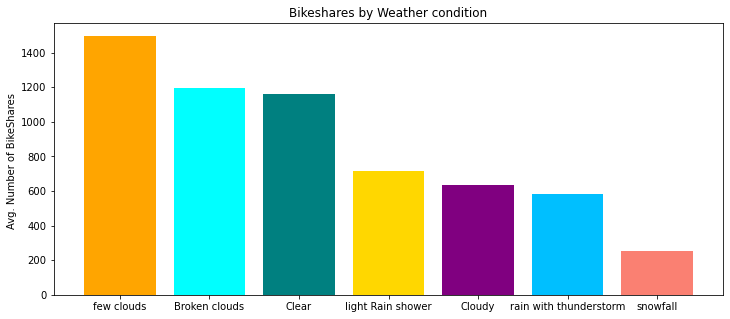

In [49]:
plt.figure(figsize=(12,5))
plt.bar(dfweather.index, dfweather, color= ['orange','aqua','teal','gold','purple','deepskyblue','salmon'])
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by Weather condition")
plt.show()
### From here we can see that the average of people ride bikes are in day with few clouds

In [50]:
dfweather1 = dfcopy.groupby('weather_code')['cnt'].sum().sort_values(ascending = False)

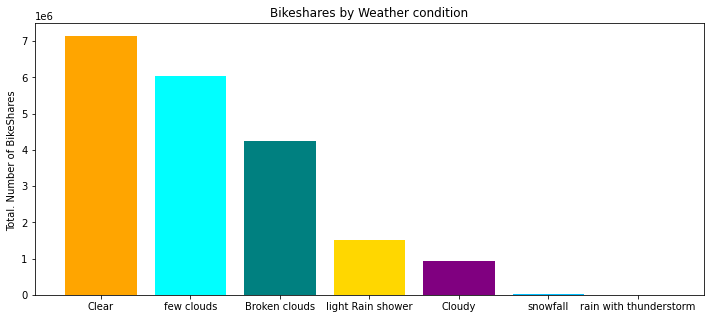

In [51]:
plt.figure(figsize=(12,5))
plt.bar(dfweather1.index, dfweather1, color= ['orange','aqua','teal','gold','purple','deepskyblue','salmon'])
plt.ylabel("Total. Number of BikeShares ")
plt.title("Bikeshares by Weather condition")
plt.show()
#### But from here we can see that total who ride on clear sky are more than other weather

- Few clouds and Clear sky are the most popular weather for people to ride the bike
- There are still some people who ride in snowfall and rain with thunderstorm
- Clearly affect the usage of bike share

#### Bikeshare in Holiday

In [52]:
dfholiday = df.groupby('is_holiday')['cnt'].mean().sort_values(ascending = False)

In [53]:
dfholiday1 = df.groupby('is_holiday')['cnt'].sum().sort_values(ascending = False)

In [54]:
dfholiday

is_holiday
0.0    1151.525191
1.0     769.526042
Name: cnt, dtype: float64

In [55]:
dfholiday1

is_holiday
0.0    19610474
1.0      295498
Name: cnt, dtype: int64

In [56]:
pd.crosstab(index= df['is_holiday'], columns = 'Average of Bike Share', values =df['cnt'],aggfunc='mean')

col_0,Average of Bike Share
is_holiday,
0.0,1151.525191
1.0,769.526042


In [57]:
df_holiday = df[df['is_holiday']==1]

In [58]:
pd.crosstab(index= df_holiday['date'], columns = df_holiday['is_holiday'], values =df_holiday['cnt'],aggfunc='sum', margins = True)

is_holiday,1.0,All
date,,
2015-04-03,11298,11298
2015-04-06,25439,25439
2015-05-04,26795,26795
2015-05-25,29502,29502
2015-08-31,9639,9639
2015-12-25,22423,22423
2015-12-28,13732,13732
2016-01-01,9797,9797
2016-03-25,25236,25236


In [59]:
pd.crosstab(index= df_holiday['date'], columns = df_holiday['is_holiday'], values =df_holiday['cnt'],aggfunc='mean')

is_holiday,1.0
date,
2015-04-03,470.750000
2015-04-06,1059.958333
2015-05-04,1116.458333
2015-05-25,1229.250000
2015-08-31,401.625000
2015-12-25,934.291667
2015-12-28,572.166667
2016-01-01,408.208333
2016-03-25,1051.500000


In [60]:
dfholidays = df_holiday.groupby('date')['cnt'].mean().sort_values(ascending = False)
dfholidays1 = df_holiday.groupby('date')['cnt'].sum().sort_values(ascending = False)

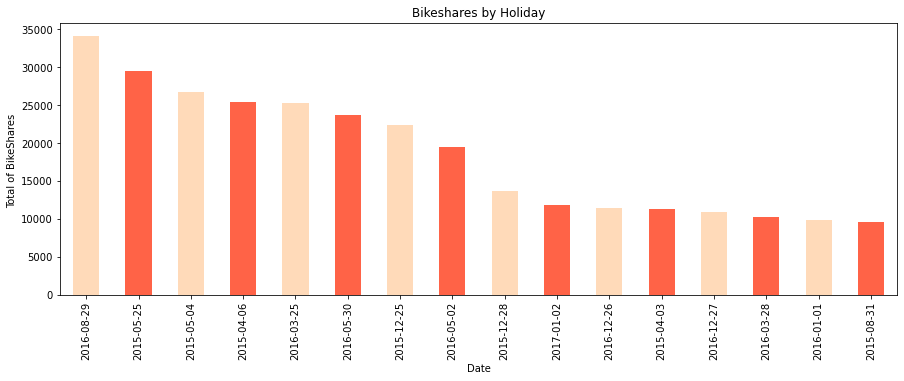

In [61]:
plt.figure(figsize=(15,5))
dfholidays1.plot(kind='bar', color=['peachpuff','tomato'])
plt.xlabel("Date")
plt.ylabel("Total of BikeShares ")
plt.title("Bikeshares by Holiday")
plt.show()

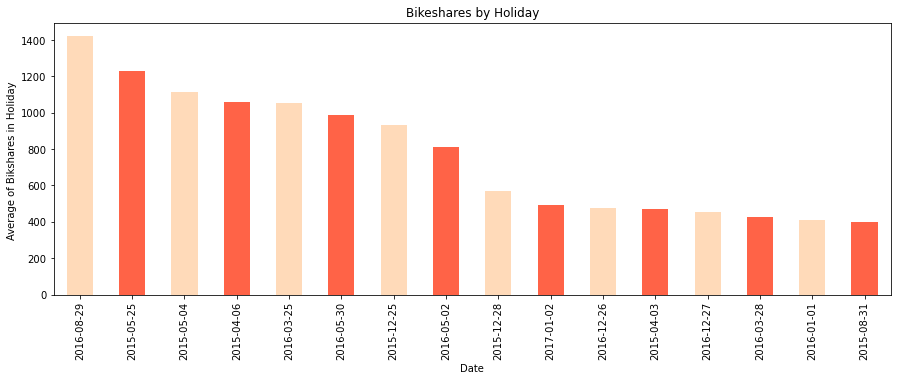

In [62]:
plt.figure(figsize=(15,5))
dfholidays.plot(kind='bar', color=['peachpuff','tomato'])
plt.xlabel("Date")
plt.ylabel("Average of Bikshares in Holiday ")
plt.title("Bikeshares by Holiday")
plt.show()

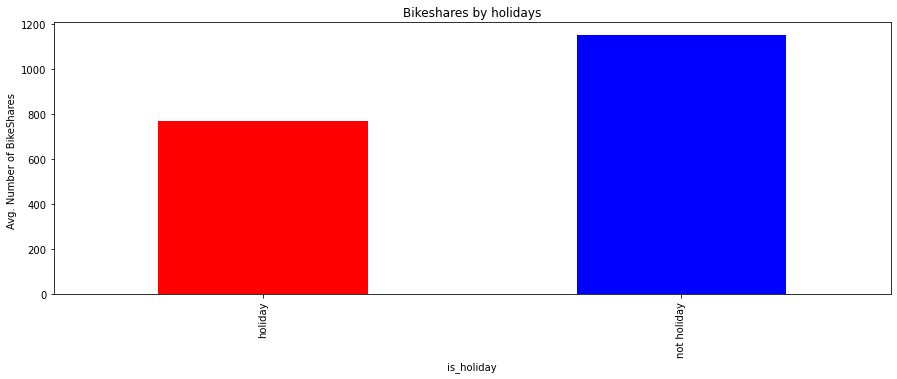

In [63]:
dfcopy['is_holiday'] = df['is_holiday'].map({0: "not holiday", 1:"holiday"})
plt.figure(figsize=(15,5))
df_holiday =dfcopy.groupby(['is_holiday']).mean()['cnt']
df_holiday.plot(kind='bar',color=['red', 'blue'])
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by holidays")
plt.show()

- Holiday season did not affect much the use of bike share, there are no significant increase in the use of bike share
- Because there are not so many public holiday in London from 4 jan 2015 to 4 jan 2017
- There are 16 public holidays from 4 jan 2015 to 4 jan 2017
- During holiday there are  295498 bike has been use
- The most popular holiday people using bikeshare is 29 August 2016 it is a summer bank holiday
- Summer holiday is more popular than winter holiday such as christmas and new year
- Average of bike share during holiday every hour is 769

#### Bikeshares on Weekend and Weekdays

In [64]:
pd.crosstab(index= df['is_weekend'], columns = 'Average of Bike Share', values =df['cnt'],aggfunc='mean')

col_0,Average of Bike Share
is_weekend,
0.0,1209.274831
1.0,977.415694


In [65]:
dfweekend = df[df['is_weekend']==1]

In [66]:
pd.crosstab(index= dfweekend['day'], columns = dfweekend['is_weekend'], values =dfweekend['cnt'],aggfunc='sum', margins = True)

is_weekend,1.0,All
day,,
Saturday,2454040,2454040
Sunday,2403716,2403716
All,4857756,4857756


In [67]:
pd.crosstab(index= dfweekend['day'], columns = dfweekend['is_weekend'], values =dfweekend['cnt'],aggfunc='mean').round(2)

is_weekend,1.0
day,
Saturday,995.55
Sunday,959.57


In [68]:
dfweekday = df[df['is_weekend']==0]

In [69]:
pd.crosstab(index= dfweekday['day'], columns = dfweekday['is_weekend'], values =dfweekday['cnt'],aggfunc='sum', margins = True)

is_weekend,0.0,All
day,,
Friday,2897793,2897793
Monday,2834719,2834719
Thursday,3136956,3136956
Tuesday,3081414,3081414
Wednesday,3097334,3097334
All,15048216,15048216


In [70]:
pd.crosstab(index= dfweekday['day'], columns = dfweekday['is_weekend'], values =dfweekday['cnt'],aggfunc='mean').round(2)

is_weekend,0.0
day,
Friday,1182.77
Monday,1130.27
Thursday,1258.81
Tuesday,1230.11
Wednesday,1244.41


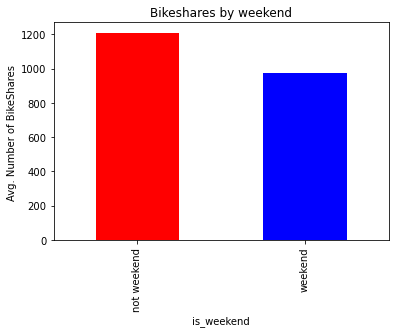

In [71]:
dfcopy['is_weekend'] = dfcopy['is_weekend'].map({0: "not weekend", 1:"weekend"})
dfweekend =dfcopy.groupby(['is_weekend']).mean()['cnt']
dfweekend.plot(kind='bar',color=['red', 'blue'])
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekend")
plt.show()

In [72]:
dfday = df.groupby('day')['cnt'].mean().sort_values(ascending = False)
dfday1 = df.groupby('day')['cnt'].sum().sort_values(ascending = False)

In [73]:
dfday

day
Thursday     1258.810594
Wednesday    1244.409000
Tuesday      1230.105389
Friday       1182.772653
Monday       1130.270734
Saturday      995.553753
Sunday        959.567265
Name: cnt, dtype: float64

In [74]:
dfday1

day
Thursday     3136956
Wednesday    3097334
Tuesday      3081414
Friday       2897793
Monday       2834719
Saturday     2454040
Sunday       2403716
Name: cnt, dtype: int64

In [75]:
dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
dfday = dfday.reindex(index = dayorder)
dfday1 = dfday1.reindex(index = dayorder)

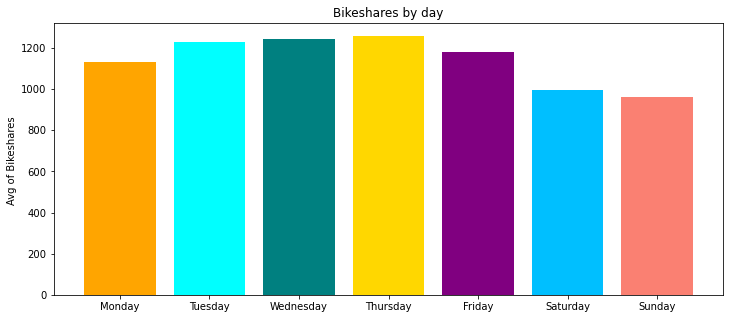

In [76]:
plt.figure(figsize=(12,5))
plt.bar(dfday.index, dfday, color= ['orange','aqua','teal','gold','purple','deepskyblue','salmon'])
plt.ylabel("Avg of Bikeshares ")
plt.title("Bikeshares by day")
plt.show()

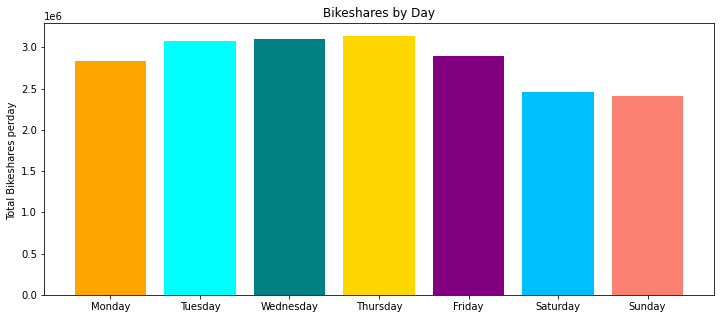

In [77]:
plt.figure(figsize=(12,5))
plt.bar(dfday1.index, dfday1, color= ['orange','aqua','teal','gold','purple','deepskyblue','salmon'])
plt.ylabel("Total Bikeshares perday ")
plt.title("Bikeshares by Day")
plt.show()

- From all the analysis above, Thursday is the most favorite day in all three years to ride a bike then followed by wednesday
- As for the weekend, more people ride on saturday than sunday, but the different is little
- In total of three years there are 4857756 bikes in total that use on Saturday and Sunday
- As for weekdays there are 15048216 in total
- Average of people using bike in weekend is 977.415694 around 1000, so better to prepare atleast 1000 bike or more in weekend for every hour
- As for weekdays the average is around 1209.274831, recommending to preaper atleast 1210 bike for weekdays for every hour

#### Bikeshares in different Seasons

In [78]:
dfseason = df.groupby('season')['cnt'].mean().sort_values(ascending = False)
dfseason

season
1.0    1464.465238
2.0    1178.954218
0.0    1103.831589
3.0     821.729099
Name: cnt, dtype: float64

In [79]:
dfseason1 = df.groupby('season')['cnt'].sum().sort_values(ascending = False)
dfseason1

season
1.0    6424609
2.0    5073040
0.0    4850236
3.0    3558087
Name: cnt, dtype: int64

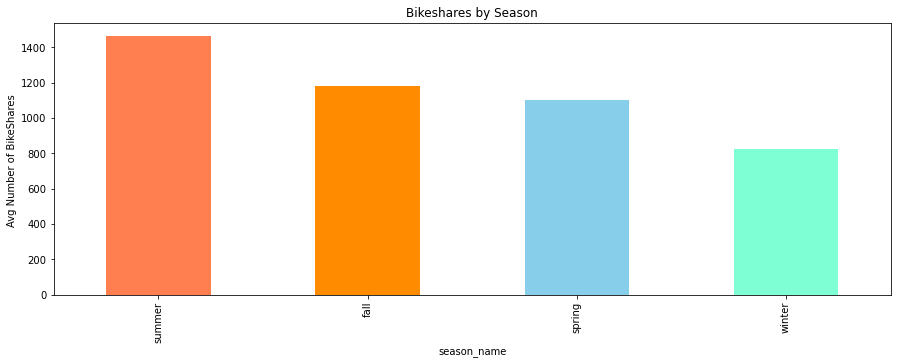

In [80]:
#seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
dfcopy['season_name'] = dfcopy['season'].map({0: "spring", 1:"summer", 2:"fall", 3:"winter"})
dfseasons = dfcopy.groupby('season_name')['cnt'].mean().sort_values(ascending = False)
plt.figure(figsize=(15,5))
dfseasons.plot(kind='bar', color = ['coral','darkorange','skyblue','aquamarine'])
plt.ylabel("Avg Number of BikeShares ")
plt.title("Bikeshares by Season")
plt.show()

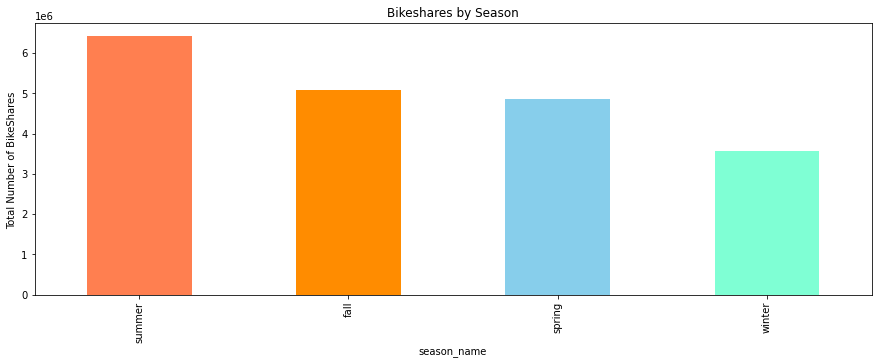

In [81]:
dfseasons1 = dfcopy.groupby('season_name')['cnt'].sum().sort_values(ascending = False)
plt.figure(figsize=(15,5))
dfseasons1.plot(kind='bar', color = ['coral','darkorange','skyblue','aquamarine'])
plt.ylabel("Total Number of BikeShares ")
plt.title("Bikeshares by Season")
plt.show()

- Summer is the most popular season for people to use bikeshare followed by fall
- **Total of bike per season :**
- summer = 6424609
- fall   = 5073040
- spring = 4850236
- winter = 3558087
- **Average of bike share per season:**
- summer = 1464.465238
- fall   = 1178.954218
- spring = 1103.831589
- winter = 821.729099
- As summer is mostly school holiday with a great temp and clear sky people like to ride bike more

#### Analyzing why summer is the busiest season

In [82]:
data1 = pd.crosstab(index= dfcopy['season_name'], columns = 'Average of temperature', values =df['t1'],aggfunc='mean')
data1

col_0,Average of temperature
season_name,
fall,13.039236
spring,10.666705
summer,18.431160
winter,7.686952


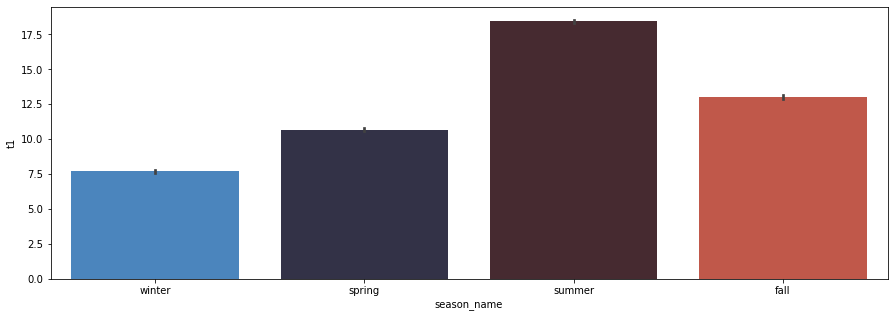

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x = dfcopy['season_name'], y=df['t1'], data = data1, palette = 'icefire')
plt.show()

In [84]:
data2 = pd.crosstab(index= dfcopy['season_name'], columns = 'Average of humidity', values =df['hum'],aggfunc='mean')
data2

col_0,Average of humidity
season_name,
fall,76.095863
spring,68.598259
summer,66.845111
winter,77.911316


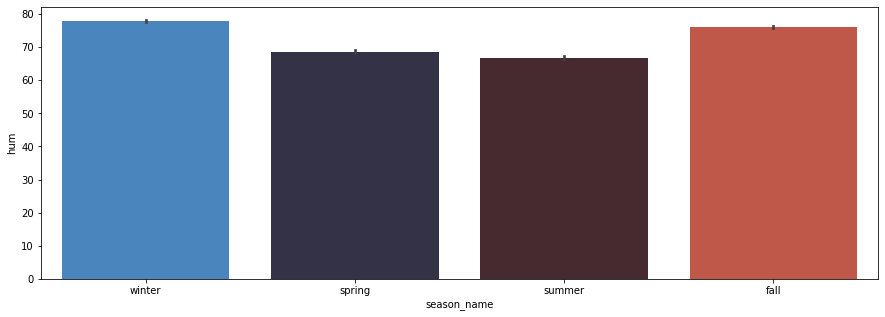

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x = dfcopy['season_name'], y=df['hum'], data = data1, palette = 'icefire')
plt.show()

In [86]:
data3 = pd.crosstab(index= dfcopy['season_name'], columns = 'Average of windspeed', values =df['wind_speed'],aggfunc='mean')
data3

col_0,Average of windspeed
season_name,
fall,14.330428
spring,16.395482
summer,15.783793
winter,17.127252


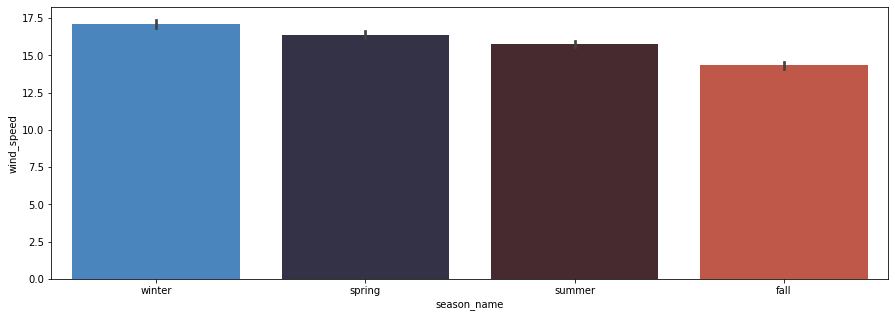

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(x = dfcopy['season_name'], y=df['wind_speed'], data = data1, palette = 'icefire')
plt.show()

In [88]:
pd.crosstab(index= dfcopy['season_name'], columns = dfcopy['Temp_Class'])

Temp_Class,freezing,cold,warm,hot
season_name,,,,
fall,553,3561,182,6
spring,1344,2987,63,0
summer,0,3192,1173,22
winter,2474,1833,0,0


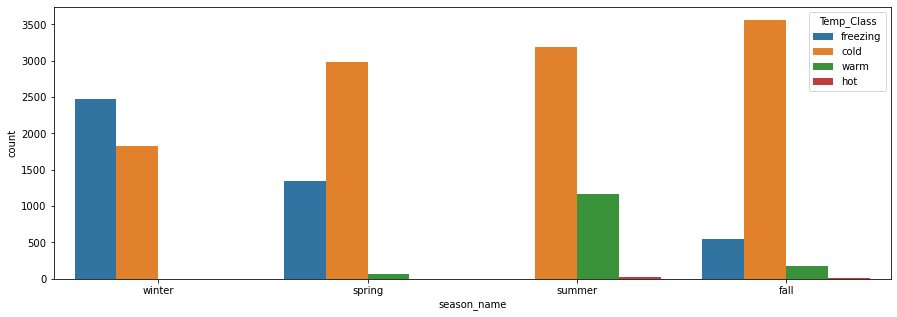

In [89]:
plt.figure(figsize=(15,5))
sns.countplot(dfcopy['season_name'], hue=dfcopy['Temp_Class'])
plt.show()

In [90]:
pd.crosstab(index= dfcopy['season_name'], columns = dfcopy['level_hum']) 

level_hum,low,optimal,high,very high
season_name,,,,
fall,20,488,1954,1841
spring,177,1129,1935,1153
summer,182,1321,1888,996
winter,1,312,1978,2039


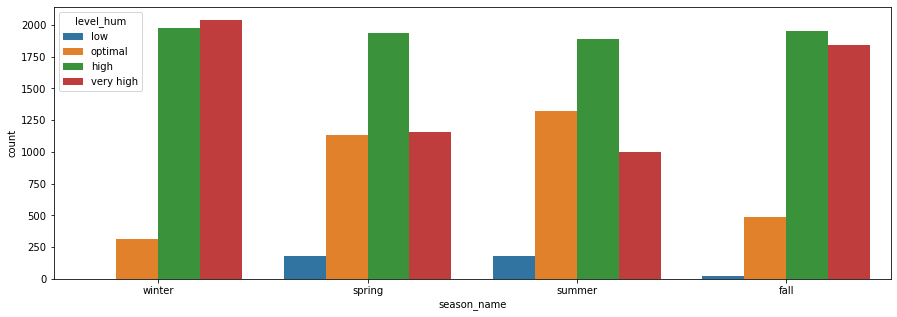

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(dfcopy['season_name'], hue=dfcopy['level_hum'])
plt.show()

In [92]:
pd.crosstab(index= dfcopy['season_name'], columns = dfcopy['wind_scale'])

wind_scale,light,gentle,fresh,moderate,strong
season_name,,,,,
fall,1985,1796,459,58,5
spring,1502,2148,639,87,18
summer,1500,2305,563,19,0
winter,1517,1785,866,152,10


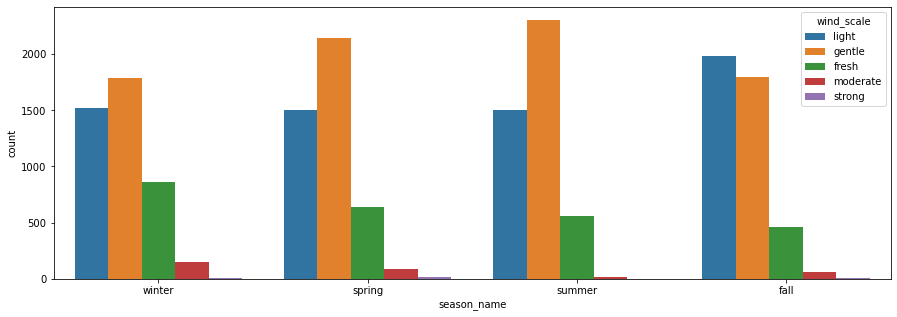

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(dfcopy['season_name'], hue=dfcopy['wind_scale'])
plt.show()

- People like to ride in cold or average temp of around 13-18 degrees
- Probably winter and spring have several days with a freezing temp
- Looking at all this table summer have the lowest value of very high humidity and highest value optimal humidity
- During summer there are no strong wind speed which might be people actually looking for
- According to the website the ideal to ride a bicycle is around 60s Fareniheit in Celcius is aroun 15-20s degree
- Average of summer temperature in London is aroud 17 degreess celcius
https://www.accuweather.com/en/weather-news/what-are-the-best-worst-weather-conditions-for-cycling-2/432641#:~:text=Some%20would%20prefer%20to%20ride,most%2C%20according%20to%20USA%20Cycling.

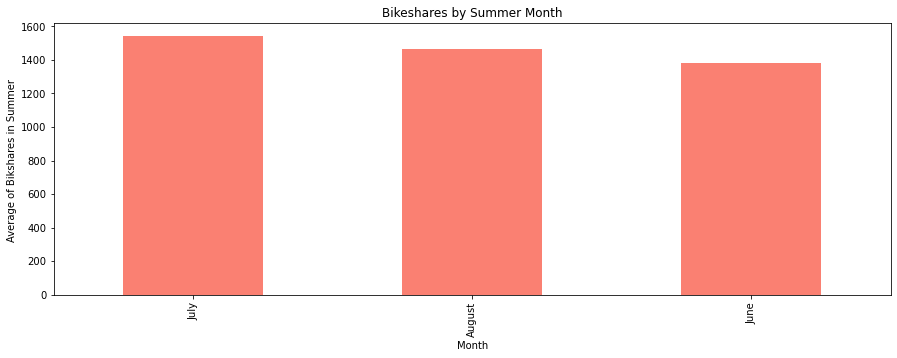

In [94]:
dfsummer = df[df['season']== 1]
dfsummer1 = dfsummer.groupby('month')['cnt'].mean().sort_values(ascending = False)
plt.figure(figsize=(15,5))
dfsummer1.plot(kind='bar', color = 'salmon')
plt.xlabel("Month")
plt.ylabel("Average of Bikshares in Summer ")
plt.title("Bikeshares by Summer Month")
plt.show()

- The most popular month in summer is July with average of 1500 bike per hour
- Recommending to prepare as many bike as the company can since summer is the most popular period

#### Bikeshares per month

In [95]:
dfmonth = df.groupby('month')['cnt'].mean().sort_values(ascending = False)
dfmonth

month
July         1543.696151
August       1463.116577
June         1383.354430
September    1356.597561
May          1275.099462
October      1217.546991
April        1112.953408
November      965.867832
March         921.294959
December      845.516173
February      836.279617
January       784.691997
Name: cnt, dtype: float64

Text(0.5, 0.98, 'Bikeshares by Month')

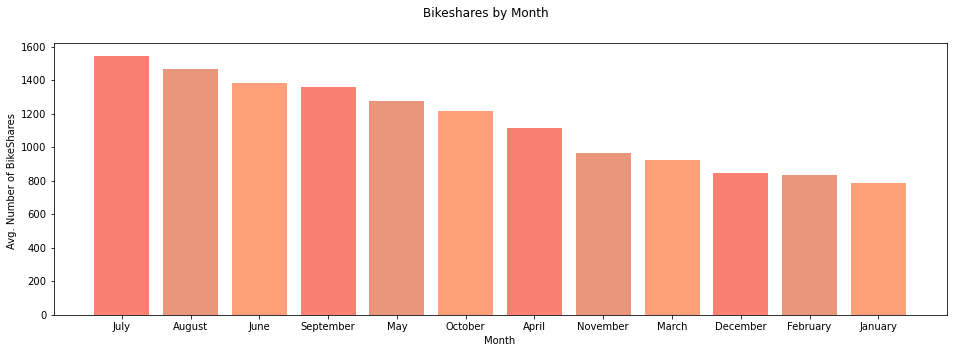

In [96]:
plt.figure(figsize=(16,5))
plt.bar(dfmonth.index, dfmonth, color= ['salmon','darksalmon','lightsalmon'])
plt.xlabel("Month")
plt.ylabel("Avg. Number of BikeShares ")
plt.suptitle("Bikeshares by Month")

- July, August, June are the period of summer, thats why its the most popular
- September and October are Fall period
- Looking at this chart showing that season is affecting the rise of people using bike share

#### Bikesahres by the time of the day

In [97]:
dfhour = df.groupby('hour')['cnt'].mean().sort_values(ascending = False)
dfhour

hour
8     2882.823204
17    2829.585165
18    2629.043956
16    1869.801370
9     1653.019257
19    1651.510316
15    1564.621399
13    1505.739011
14    1472.004121
7     1468.745179
12    1433.717421
11    1151.218707
10    1064.660690
20    1059.781293
21     741.249311
22     592.409655
6      466.626722
23     439.652355
0      290.609116
1      200.631215
2      136.303745
5      110.707351
3       94.245492
4       73.313454
Name: cnt, dtype: float64

Text(0.5, 0.98, 'Bikeshares by Time')

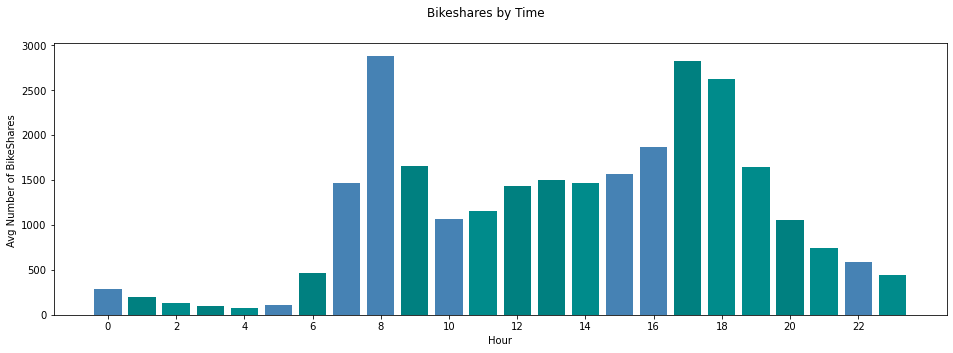

In [98]:
plt.figure(figsize=(16,5))
plt.bar(dfhour.index, dfhour, color= ['steelblue','teal','darkcyan'])
plt.xlabel("Hour")
plt.ylabel("Avg Number of BikeShares ")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.suptitle("Bikeshares by Time")

In [99]:
pd.pivot_table(data=df, index='day', values = ['cnt'], columns=['hour'])

cnt                                                  \
hour               0           1           2           3           4    
day                                                                     
Friday     281.519608  176.382353  113.647059   75.485149   63.336634   
Monday     212.471154  119.663462   74.605769   49.240385   52.355769   
Saturday   460.117647  355.735294  255.267327  180.178218  121.594059   
Sunday     499.125000  410.259615  297.203883  214.192308  130.942308   
Thursday   212.951923  126.269231   83.567308   53.817308   51.836538   
Tuesday    168.380952  101.952381   65.403846   42.355769   46.576923   
Wednesday  203.116505  116.815534   68.320388   45.922330   47.407767   

                                                                          ...  \
hour               5           6            7            8            9   ...   
day                                                                       ...   
Friday     115.613861  542.578431  1752.613861  3572.178218  1995.843137  ...   
Monday     112.221154  536.807692  1759.971429  3504.800000  1802.523810  ...   
Saturday    93.108911  123.825243   248.834951   493.313725   873.184466  ...   
Sunday     101.278846  117.317308   177.875000   339.750000   702.423077  ...   
Thursday   117.615385  645.817308  2102.153846  4094.262136  2144.365385  ...   
Tuesday    119.000000  657.266667  2128.923810  4098.200000  2004.476190  ...   
Wednesday  115.796117  639.105769  2098.153846  4045.173077  2042.596154  ...   

                                                                            \
hour                14           15           16           17           18   
day                                                                          
Friday     1318.901961  1458.796117  1903.650485  3033.116505  2553.873786   
Monday     1178.634615  1281.221154  1689.638095  3130.714286  2990.600000   
Saturday   2096.961538  2154.076923  2049.192308  1845.913462  1558.048077   
Sunday     2139.171429  2141.400000  2030.066667  1814.295238  1600.171429   
Thursday   1247.961538  1368.701923  1858.230769  3266.310680  3144.009709   
Tuesday    1150.809524  1264.838095  1777.895238  3365.471154  3285.711538   
Wednesday  1165.317308  1279.634615  1781.336538  3364.298077  3281.538462   

                                                                         
hour                19           20          21          22          23  
day                                                                      
Friday     1581.621359  1010.281553  724.922330  634.009804  555.509804  
Monday     1759.990476  1075.750000  698.067308  498.447619  312.219048  
Saturday   1261.728155   912.252427  656.038835  598.553398  566.514563  
Sunday     1172.961905   837.819048  588.619048  476.695238  335.666667  
Thursday   1897.471154  1192.182692  846.990385  673.807692  497.407767  
Tuesday    1928.250000  1180.894231  826.339806  606.607843  378.213592  
Wednesday  1960.660194  1209.528846  849.076923  661.894231  434.673077  

[7 rows x 24 columns]

In [100]:
day_hour = pd.pivot_table(data=df, index='day', values = ['cnt'], columns=['hour'])
day_hour = day_hour.reindex(index= dayorder)

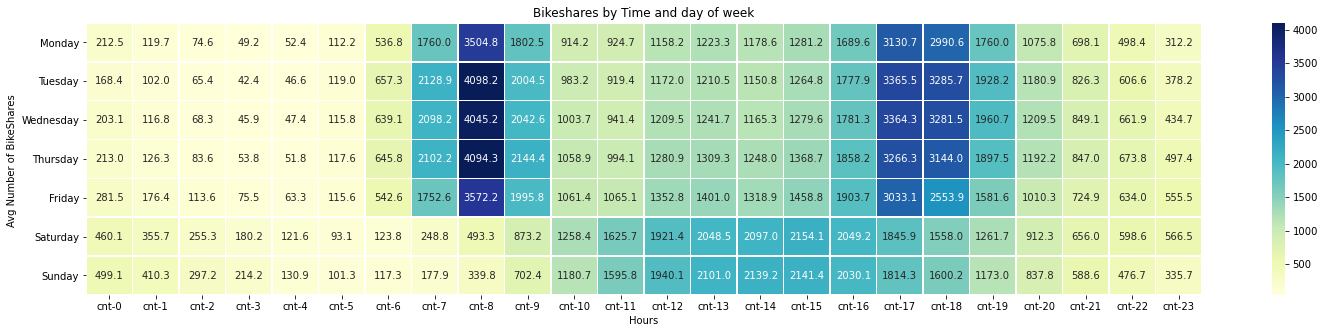

In [101]:
plt.figure(figsize=(25,5))
sns.heatmap(data=day_hour, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1f" )
plt.xlabel("Hours")
plt.ylabel("Avg Number of BikeShares ")
plt.title("Bikeshares by Time and day of week")
plt.show()

- From the barplot and the heatmap we can see 7 8 9 in the morning and 17 18 19 in the evening are the most popular time to use bike shares
- These times are when people go to work, we can assume that many people use bike share to go to work

In [102]:
dayseason = pd.pivot_table(data=dfcopy, index='day', values = ['cnt'], columns=['season_name'])
dayseason

cnt                                      
season_name         fall       spring       summer      winter
day                                                           
Friday       1244.286432  1139.032051  1456.090909  902.665064
Monday       1186.065811  1082.650641  1359.970451  883.114887
Saturday      955.049669   986.846278  1449.854167  585.799677
Sunday        974.937299   963.731554  1321.097913  578.433387
Thursday     1327.736758  1191.678973  1607.622186  909.325321
Tuesday      1282.060065  1179.371118  1520.745981  941.004815
Wednesday    1280.084142  1183.024038  1536.442901  955.626043

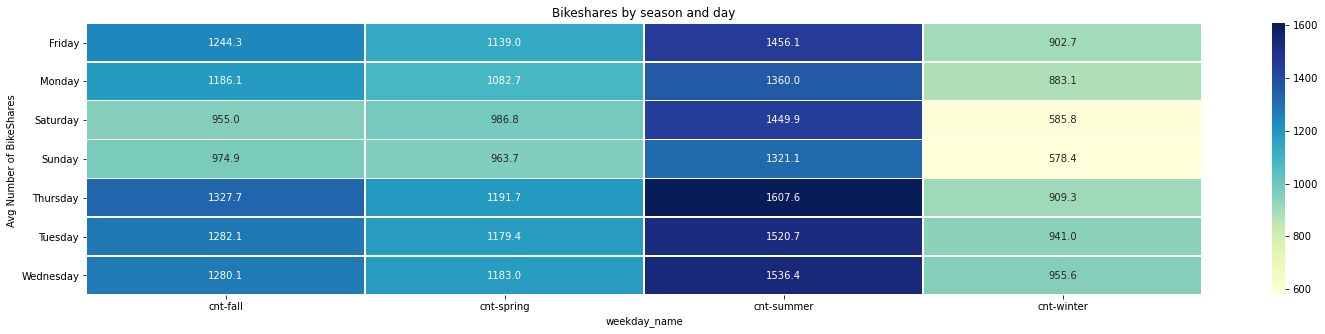

In [103]:
plt.figure(figsize=(25,5))
sns.heatmap(data=dayseason, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1f" )
plt.xlabel("weekday_name")
plt.ylabel("Avg Number of BikeShares ")
plt.title("Bikeshares by season and day")
plt.show()

#### Analyzing Bikeshares in every year

In [104]:
df.groupby('year')['cnt'].mean().sort_values(ascending = False)


year
2016    1164.449477
2015    1126.778433
2017     523.333333
Name: cnt, dtype: float64

In [105]:
df.groupby('year')['cnt'].sum().sort_values(ascending = False)


year
2016    10129546
2015     9738746
2017       37680
Name: cnt, dtype: int64

In [106]:
datayear =pd.crosstab(columns='Average of Bike Share', index=[df['year'], df['month']], values=df['cnt'], aggfunc='mean')
datayear

col_0           Average of Bike Share
year month                           
2015 April                1156.581363
     August               1389.719086
     December              814.645946
     February              810.125186
     January               814.663189
     July                 1514.441892
     June                 1441.076709
     March                 941.723951
     May                  1203.512097
     November              952.646976
     October              1175.334239
     September            1255.243319
2016 April                1069.325452
     August               1536.910811
     December              876.220430
     February              861.787791
     January               782.954301
     July                 1572.910931
     June                 1324.649645
     March                 900.585734
     May                  1346.686828
     November              978.941586
     October              1259.362046
     September            1462.106881
2017 January               523.333333

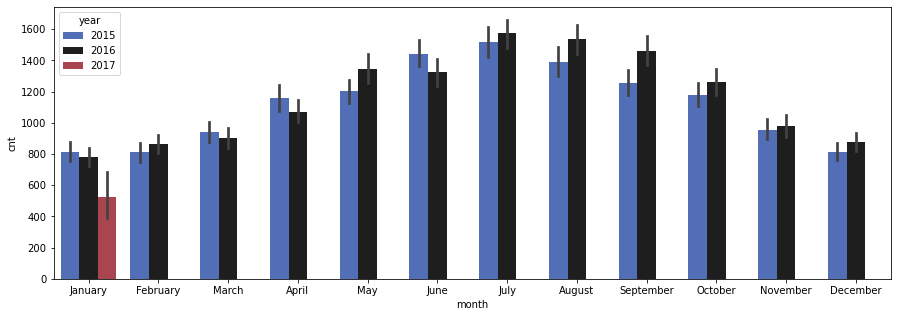

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(x = df['month'], y=df['cnt'], hue=df['year'], data = datayear, palette = 'icefire')
plt.show()

- Looking from the data above 2016 is the highest year of bikeshare utilization
- The data that recorded in 2017 is only from January so it does not have a significant impact
- July is the most popular month for people to use bike shares it is beacuse of the season
- Some months have a significant increase in the bike shares utilization
- However in June 2016 the usage of bikeshare was decrease due to flood occured in that year
- source =https://www.independent.co.uk/news/uk/home-news/uk-weather-london-flooding-floods-south-east-pictures-forecast-a7097316.html

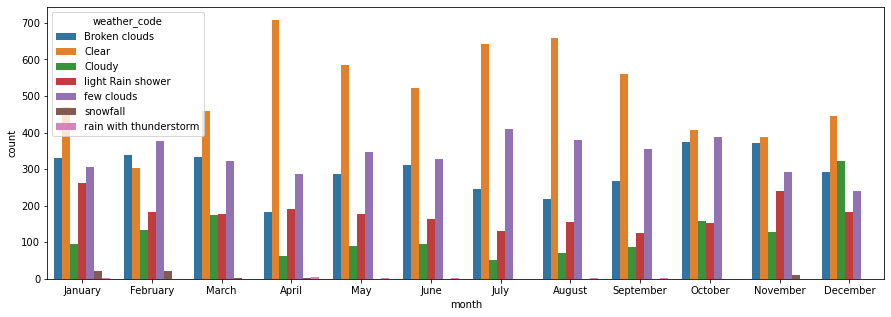

In [108]:
plt.figure(figsize=(15,5))
sns.countplot(dfcopy['month'], hue=dfcopy['weather_code'])
plt.show()

- In june there were several thunder storms that causes flood
- Refering to the graphic before, the flood cause a slight decrease in the utilizaiton of bike share
https://www.timeanddate.com/weather/uk/london/historic?month=6&year=2016